<a href="https://colab.research.google.com/github/ChintzRuparel/Computer-Vision/blob/main/Experiment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision EXP 1
  Aim : To determine gradient of the given image and use gradient to highlight edges in the image.

In [ ]:
#Computer vision version 2.
import cv2

#For mathematical caculations.
import numpy as np

#To plot the iamge.
import matplotlib.pyplot as plt

#Use image.
from skimage import data

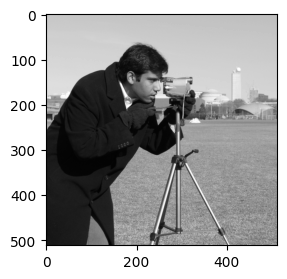

In [ ]:
#Read Image.
image = data.camera()

#For edge detection, we need grayscale.
#It is not converting color to grey image, it is just plotting image as gray.
plt.figure(figsize = (3,3))
plt.imshow(image,cmap='gray')


In [ ]:
#Row and Columns of an image
[rw,cl] = image.shape
print('Rows : ',rw,'\n')
print('Column :',cl,'\n')

#Channels
#if 2-> gray, if 3-> color
print('Channel : ',image.shape,'\n')

#Pixel value at 0,0
print(image[0,0],'\n')


Rows :  512 

Column : 512 

Channel :  (512, 512) 

200 



In [ ]:
#Filter image using sobel filter to find gradient of the image

#Gradient
#Filter size = 3x3
gx = cv2.Sobel(image,ddepth = cv2.CV_32F,dx=1,dy=0,ksize=7)
gy = cv2.Sobel(image,ddepth = cv2.CV_32F,dx=0,dy=1,ksize=7)

print(gx[0:5,0:5])



[[   0.   -8.   80.   80.  -92.]
 [   0.  -16.   87.  108.  -51.]
 [   0.  -64.   29.   76.  -26.]
 [   0. -138. -121. -105. -132.]
 [   0. -176. -238. -299. -310.]]


In [ ]:
#see gradient as image by scaling and converting to absolute

gx_scale = cv2.convertScaleAbs(gx)
gy_scale = cv2.convertScaleAbs(gy)

print(gx_scale[0:5,0:5])


[[  0   8  80  80  92]
 [  0  16  87 108  51]
 [  0  64  29  76  26]
 [  0 138 121 105 132]
 [  0 176 238 255 255]]


Text(0.5, 1.0, 'Gradient Along Y Direction')

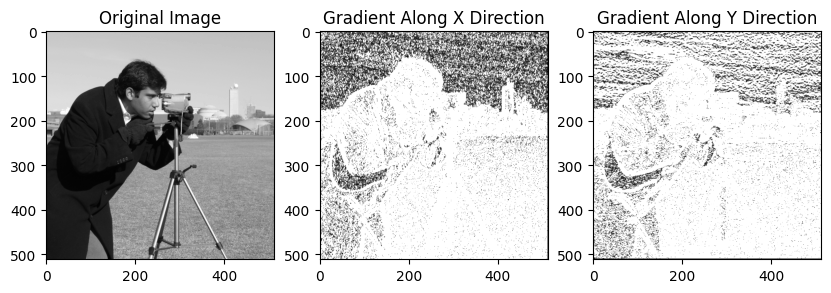

In [ ]:
#Plot Image and gradient
plt.figure(figsize = (10,10))
plt.subplot(1,3,1)
plt.imshow(image,cmap='gray')
plt.title('Original Image')

plt.subplot(1,3,2)
plt.imshow(gx_scale,cmap='gray')
plt.title('Gradient Along X Direction')

plt.subplot(1,3,3)
plt.imshow(gy_scale,cmap='gray')
plt.title('Gradient Along Y Direction')



In [ ]:
#magnitude
mag = np.sqrt((gx**2)+(gy**2))

#Converting radians to degree
angle=(np.arctan2(gy,gx))*180/np.pi

print('Magnitude : ',mag)
print('Angle : ',angle)

Magnitude :  [[0.0000000e+00 8.0000000e+00 8.0000000e+01 ... 1.4200000e+02
  1.6000000e+02 0.0000000e+00]
 [1.3600000e+02 1.4488617e+02 1.6909761e+02 ... 2.3815961e+02
  1.8591396e+02 1.0200000e+02]
 [1.4000000e+02 1.1872658e+02 2.9427877e+01 ... 3.4124771e+02
  2.8327020e+02 2.4800000e+02]
 ...
 [1.4200000e+02 1.0002000e+02 5.4167334e+02 ... 5.0664907e+03
  7.5186621e+03 8.3100000e+03]
 [1.2000000e+02 1.1600000e+02 4.9079935e+02 ... 3.4919336e+02
  3.6112075e+03 5.1280000e+03]
 [0.0000000e+00 1.1600000e+02 4.7000000e+02 ... 2.4040000e+03
  9.8200000e+02 0.0000000e+00]]
Angle :  [[   0.        180.          0.       ...    0.          0.
     0.      ]
 [ -90.        -96.34019   -59.03624  ...   60.85193    49.79983
    90.      ]
 [  90.        122.61925    -9.782407 ...   79.01934    80.03889
    90.      ]
 ...
 [ -90.        -88.85424  -177.14288  ...  162.38759   124.53128
    90.      ]
 [ -90.        -46.397182 -176.72949  ...  -80.10607    99.27451
    90.      ]
 [   0.       

Text(0.5, 1.0, 'Angle of Edge')

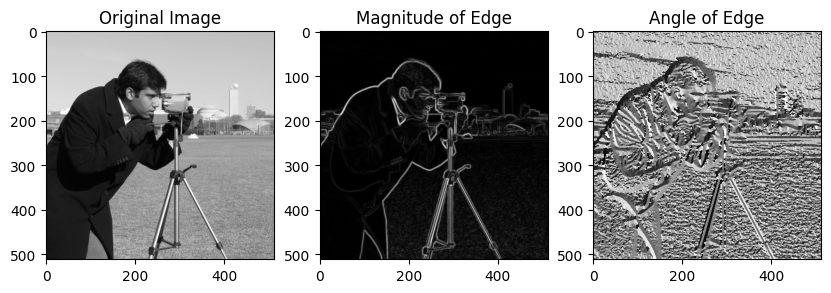

In [ ]:
plt.figure(figsize = (10,10))
plt.subplot(1,3,1)
plt.imshow(image,cmap='gray')
plt.title('Original Image')

plt.subplot(1,3,2)
plt.imshow(mag,cmap='gray')
plt.title('Magnitude of Edge')

plt.subplot(1,3,3)
plt.imshow(angle,cmap='gray')
plt.title('Angle of Edge')

In [ ]:
#Calculate maximum magnitude
np.max(np.max(mag))

140537.75

Text(0.5, 1.0, 'Magnitude of Edge afte applying Threshold')

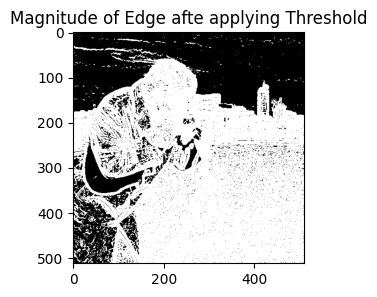

In [ ]:
#Some edges are light, so apply threshold to show the edges properly
#for filter size 3x3
# for r in range(0,rw):
#   for c in range(0,cl):
#     if mag[r,c]>100:
#       mag[r,c]=255
#     else:
#       mag[r,c]=0

#for ksize 7x7
for r in range(0,rw):
  for c in range(0,cl):
    if mag[r,c]>900:
      mag[r,c]=255
    else:
      mag[r,c]=0

plt.figure(figsize = (3,3))
plt.imshow(mag,cmap='gray')
plt.title('Magnitude of Edge afte applying Threshold')

#increase threshold -> few edge point
#decrease threshold -> more edge point

Conclusion
1. For the given image, sobel filter of size (3,3) is used to determine magnitude and angle of the given image.
2. For threshold = 100 ,the magnitude of the gradient shows prominent horizontal and verical edges.
3. For filter size is increased from (3,3) to (7,7), the edges become thicker.
4. More the size of the filter, more the thickness of the edges.
5. This is beacuse more number of pixel have large magnitude, which leads to more number of edgepoints.
6. To identify true edgepoints, increase the threshold from 100 to 900.